## Simple Moving Average Strategy


SMA is one of the oldest and simplest trading strategies. As the name implies this technique uses a rolling average of 'D' days and 'D-1' days are not taken into consideration as they are used for calculation. So, if we calculate a 5 days moving average the 1st 4 days value will not be considered.

###### Let's start this by implementing it on Python.

In [1]:
# Importing libraries and loading data into the dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2') # Setting the style of the plots.

my_year_month_fmt = mdates.DateFormatter('%m/%y') # Creating a custom data formatter.

data = pd.read_csv('SP500.csv')
data.head()

,observation_date,Oil,SP500
0,05/08/13,103.79,1632.69
1,05/09/13,103.59,1626.67
2,05/10/13,101.31,1633.70
3,05/13/13,102.17,1633.77
4,05/14/13,102.70,1650.34


In [2]:
# Shape of the data
data.shape

(1229, 3)

In [3]:
# Checking if there are any null values in the data
data.isnull().sum()

observation_date    0
Oil                 0
SP500               0
dtype: int64

In [4]:
# Getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 3 columns):
observation_date    1229 non-null object
Oil                 1229 non-null float64
SP500               1229 non-null float64
dtypes: float64(2), object(1)
memory usage: 28.9+ KB


In [5]:
#Exploring the data
data.describe()

,Oil,SP500
count,1229.000000,1229.000000
mean,68.660724,2103.902449
std,26.075523,280.406095
min,26.010000,1573.090000
25%,48.110000,1921.840000
50%,57.730000,2075.000000
75%,101.150000,2267.890000
max,117.150000,2872.870000


So we can see the Oil price for the past 5 years have been between *ÚSD 26.03* to *USD 117.15* with a average price of *USD 68.66*

In [6]:
# Indexing the date to plot a good time-series on the graph
import datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.index = data['observation_date']
del data['observation_date']

In [7]:
# Calculating the short-window simple moving average. Window = 20 Days
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,Oil,SP500
observation_date,,
2013-05-08,NaN,NaN
2013-05-09,NaN,NaN
2013-05-10,NaN,NaN
2013-05-13,NaN,NaN
2013-05-14,NaN,NaN
2013-05-15,NaN,NaN
2013-05-16,NaN,NaN
2013-05-17,NaN,NaN
2013-05-20,NaN,NaN


In [8]:
# Calculating the long-window simple moving average. Window: 100 Days
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,Oil,SP500
observation_date,,
2018-05-01,67.4534,2687.3259
2018-05-02,67.5474,2688.8040
2018-05-03,67.6466,2690.3518
2018-05-04,67.7484,2691.1847
2018-05-07,67.8614,2691.2566


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E6FB75B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027E6FBA9358>]], dtype=object)

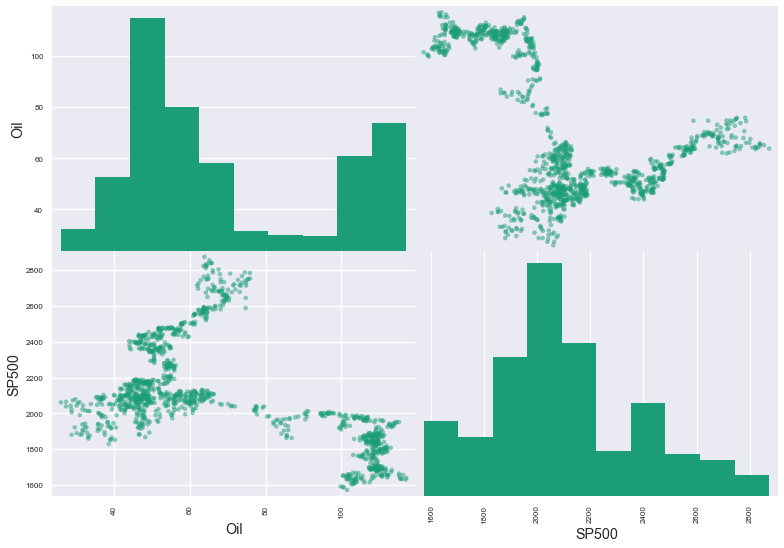

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (13, 9), hist_kwds = {'bins' : 10})

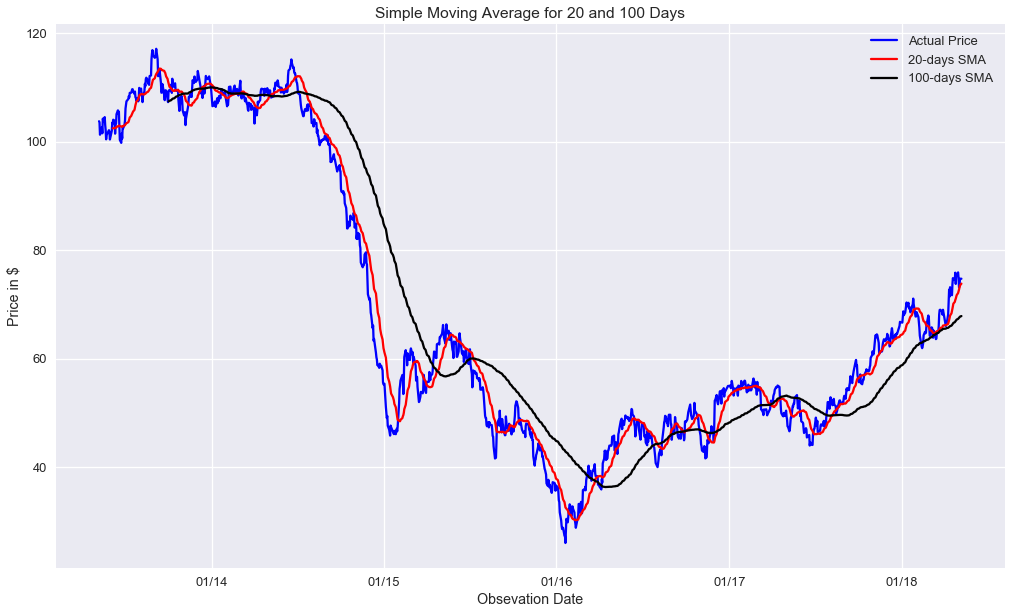

In [10]:
# Plotting the curves for Actual Price, Short window and Long Window.

start_date = '2013-05-08'
end_date = '2018-05-07'

fig, ax = plt.subplots(figsize=(17,10)) # Setting the size of the plot.

#ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'SP500'], label='SP500', color = 'green')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Oil'], label='Actual Price', color = 'blue')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Oil'], label = '20-days SMA', color = 'red')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Oil'], label = '100-days SMA', color = 'black')


ax.legend(loc='best')
ax.set_title('Simple Moving Average for 20 and 100 Days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

Although the SMA curve is much more smoother and less noisy than the Actual Price, it has a huge demerit. The SMA curve has a lagging value than the original price timeseries. This lag (L) is actually equal to D/2 days where D is the window for the SMA. So, if the SMA window is of 100 days, then the lag is almost of 50 Days, which, does not benefit us.
Now, to make the timeseries prediction more accurate, we can have the exponential moving average (EMA).
Not going into the mathematics of EMA, I came to know that EMA puts more weight on the recent observations unlike the SMA which holds all the observations equally.

##### Let's calculate the EMA with a 20-Days Span to have a comparable result to the SMA.

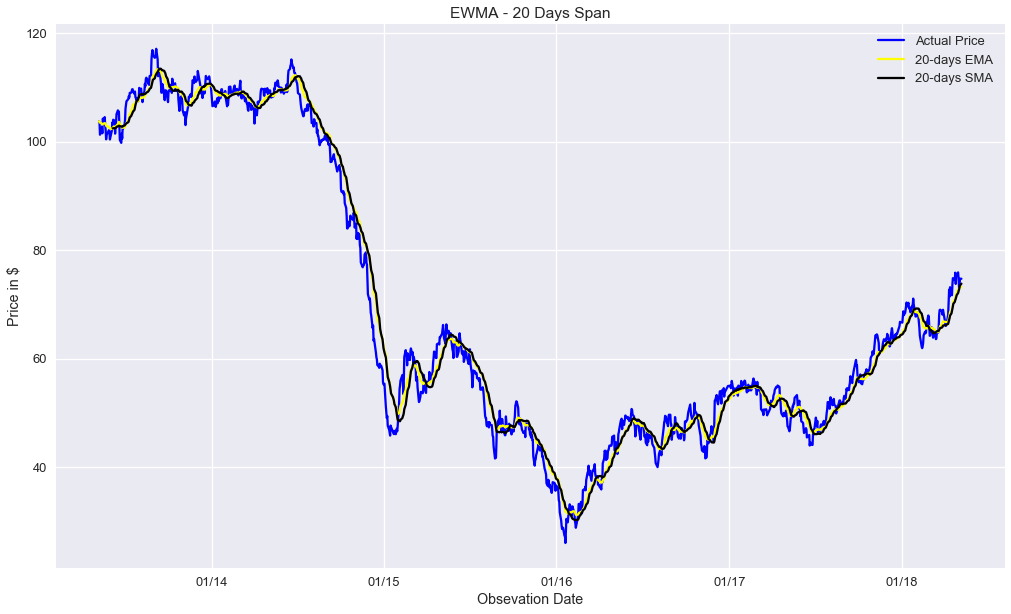

In [11]:
# Calculating a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.

ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Oil'], label='Actual Price', color = 'blue')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Oil'], label = '20-days EMA', color = 'yellow')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Oil'], label = '20-days SMA', color = 'black')

ax.legend(loc='best')
ax.set_title('EWMA - 20 Days Span')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### Trading Strategy

 * When the Actual Price timeseries (Blue) crosses the EMA timeseries (Yellow) from below, we will go long (buy).

 * When the Actual Price timeseries (Blue) crosses the EMA timeseries (Yellow) from above, we will go short (sell).

In [12]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,Oil,SP500
observation_date,,
2018-05-01,1.992746,-24.512417
2018-05-02,0.255818,-18.540758
2018-05-03,0.511930,-21.307829
2018-05-04,1.639365,-81.019464
2018-05-07,1.483235,-123.454277


In [13]:
# Taking the sign of the difference to determine whether the price or the EMA is greater
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,Oil,SP500
observation_date,,
2018-05-01,1.0,-1.0
2018-05-02,1.0,-1.0
2018-05-03,1.0,-1.0
2018-05-04,1.0,-1.0
2018-05-07,1.0,-1.0


In [14]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)
trading_positions_final

,Oil,SP500
observation_date,,
2013-05-08,NaN,NaN
2013-05-09,0.0,0.0
2013-05-10,-1.0,-1.0
2013-05-13,-1.0,1.0
2013-05-14,-1.0,1.0
2013-05-15,-1.0,1.0
2013-05-16,-1.0,1.0
2013-05-17,1.0,1.0
2013-05-20,1.0,1.0


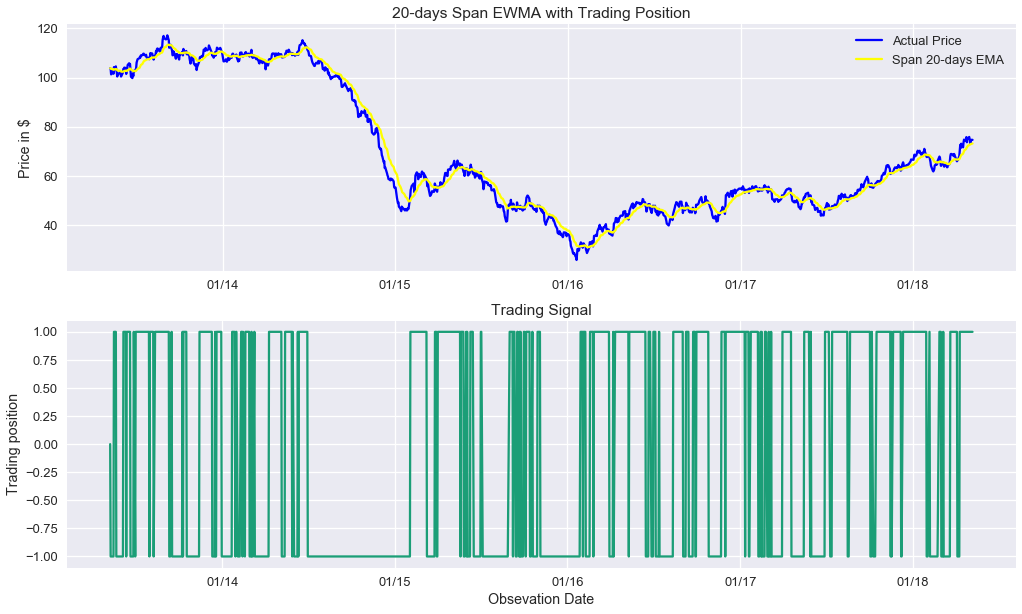

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17,10))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Oil'], label='Actual Price', color = 'blue')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Oil'], label = 'Span 20-days EMA', color = 'yellow')

ax1.set_title('20-days Span EWMA with Trading Position')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Oil'], 
        label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Obsevation Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

So the trading position at 1 means Buy and -1 means sell.

In [16]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()

,Oil,SP500
observation_date,,
2013-05-08,NaN,NaN
2013-05-09,-0.001929,-0.003694
2013-05-10,-0.022256,0.004312
2013-05-13,0.008453,0.000043
2013-05-14,0.005174,0.010091


In [17]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Oil,SP500
observation_date,,
2018-05-01,-0.014194,-0.014306
2018-05-02,-0.023111,-0.001481
2018-05-03,0.004229,0.001846
2018-05-04,0.017544,0.025485
2018-05-07,0.000000,0.021190


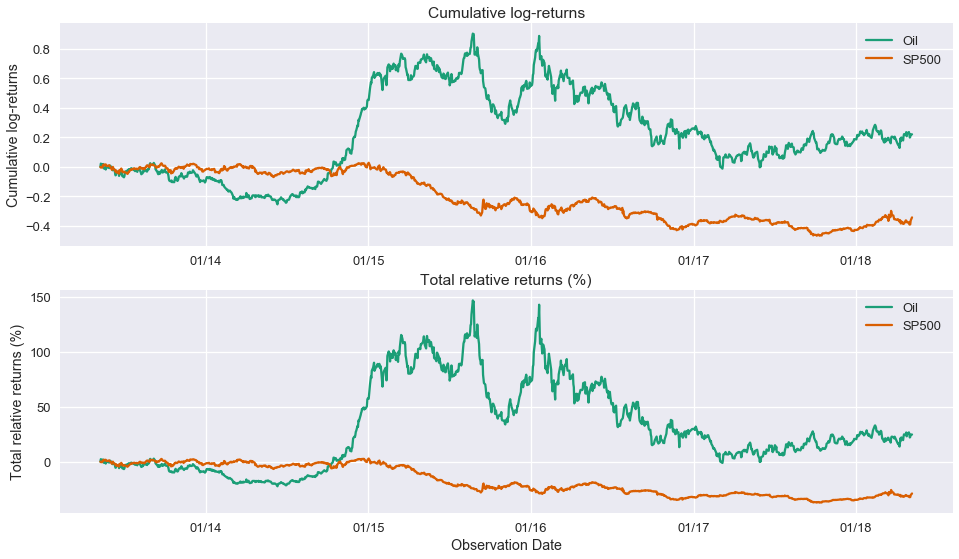

In [35]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_title('Cumulative log-returns')
ax2.set_xlabel('Observation Date')
ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))
ax2.set_title('Total relative returns (%)')
ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

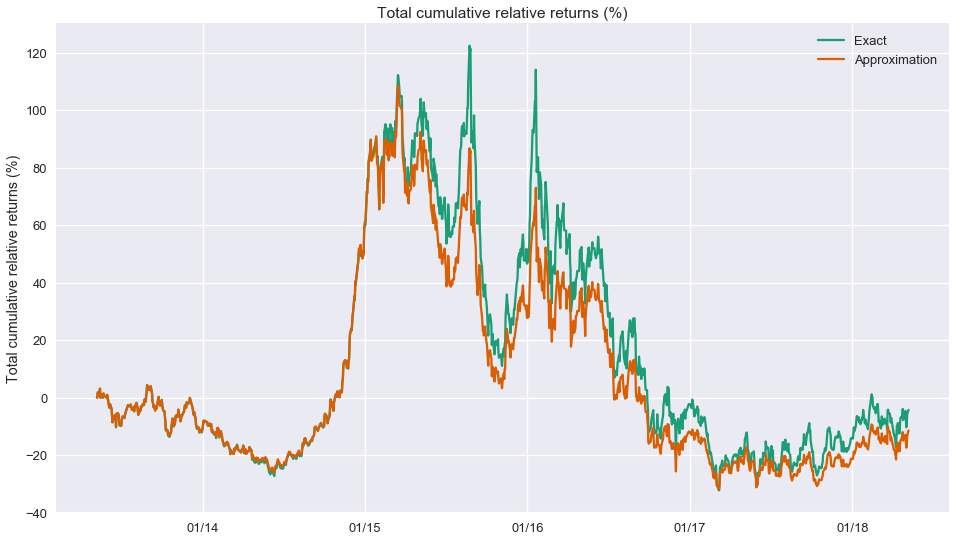

In [19]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_title('Total cumulative relative returns (%)')
ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [20]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: -4.30%
Average yearly return is: -0.93%


Total portfolio return is: 10.77%
Average yearly return is:  2.19%


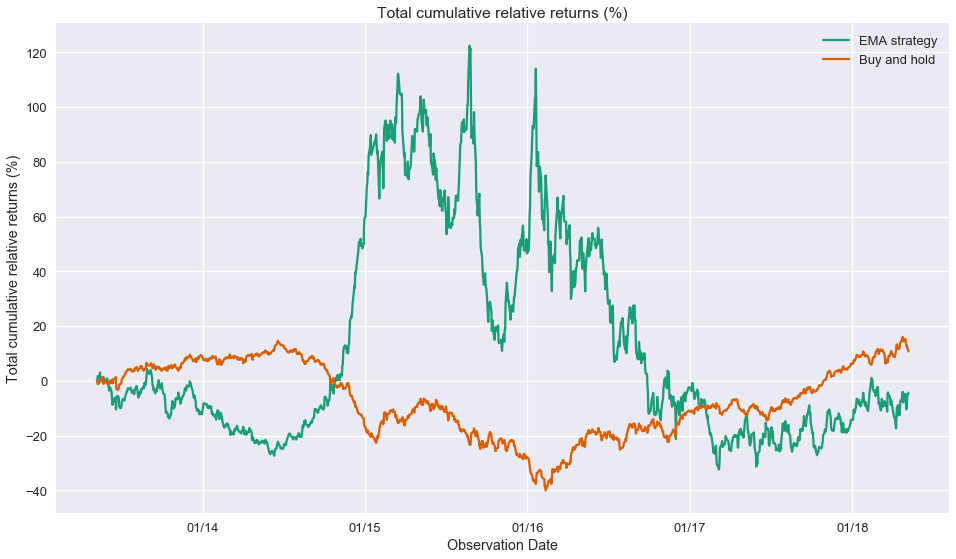

In [36]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/2, index = data.index, columns=data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_title('Total cumulative relative returns (%)')
ax.set_ylabel('Total cumulative relative returns (%)')
ax.set_xlabel('Observation Date')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)

<img src="Capture.jpg">
DataSource = Bloomberg

### Regression of Oil with SP500

In [22]:
from sklearn import linear_model

In [23]:
data.describe()

,Oil,SP500
count,1229.000000,1229.000000
mean,68.660724,2103.902449
std,26.075523,280.406095
min,26.010000,1573.090000
25%,48.110000,1921.840000
50%,57.730000,2075.000000
75%,101.150000,2267.890000
max,117.150000,2872.870000


In [24]:
data['Oil'].corr(data['SP500'])

-0.51860574196002429

The correlation is negative so the prices are inversely proportional.

In [25]:
#Hedge_Ratio = (data['Oil'].std/data['SP500'].std)*(data['Oil'].corr(data['SP500']))

In [26]:
X = data[["SP500"]]
y = data[["Oil"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 170.12391011] [[-0.04822618]]


In [27]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

C:\Users\Parija\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Oil   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     5386.
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:                -5989.5
No. Observations:                1229   AIC:                         1.198e+04
Df Residuals:                    1228   BIC:                         1.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SP500          0.0312      0.000     73.391      0.000       0.030       0.032
==============================================================================
Omnibus:                      676.319   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.956
Skew:                           0.785   Prob(JB):                     2.08e-42
Kurtosis:                       1.866   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression of Oil with Gas

In [28]:
#Loading another dataset for Gas price
df = pd.read_csv('Lecture_4.csv')

In [29]:
df.describe()

,DCOILBRENTEU,DHHNGSP
count,1273.000000,1273.000000
mean,68.605232,3.192364
std,26.099789,0.861509
min,26.010000,1.490000
25%,48.180000,2.710000
50%,57.720000,2.980000
75%,101.150000,3.700000
max,117.150000,8.150000


In [30]:
#Correlation between Oil and Gas
df['DCOILBRENTEU'].corr(df['DHHNGSP'])

0.79784239149223191

So the correlation is positive which means that the price is directly related.

In [31]:
X = df[["DHHNGSP"]]
y = df[["DCOILBRENTEU"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-8.55733493] [[ 24.17097635]]


In [32]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DCOILBRENTEU   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.588e+04
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:42:06   Log-Likelihood:                -5326.7
No. Observations:                1273   AIC:                         1.066e+04
Df Residuals:                    1272   BIC:                         1.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DHHNGSP       21.6722      0.135    160.883      0.000      21.408      21.937
==============================================================================
Omnibus:                       22.824   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.643
Skew:                           0.209   Prob(JB):                     2.22e-07
Kurtosis:                       3.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""